Reproduce Fig2: Pearson based and STTC based area ACFs and timescales.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'

### Get the data

#### ACF

In [3]:
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfdl\\acf\\' 
                                                    + 'acf_average_trial_pearsonr_with_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfp\\acf\\' 
                                                   + 'acf_average_trial_pearsonr_with_empty_50ms_20lags_df.pkl')

pfdl_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df.pkl')
pfp_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df.pkl')

pfdl_dataset_constraints_df = pd.read_pickle(results_folder + 'pfdl_dataset_constraints_df.pkl')
pfp_dataset_constraints_df = pd.read_pickle(results_folder + 'pfp_dataset_constraints_df.pkl')

# get subsets based on constraints 
pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
pfp_dataset_constraints_subset_df = pfp_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()

# join
pfdl_acf_average_trial_pearsonr_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_pearsonr_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfdl_acf_average_trial_sttc_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_sttc_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

# check NaNs

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_pearsonr_subset_df), 
                                                          len(pfp_acf_average_trial_pearsonr_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_sttc_subset_df), 
                                                          len(pfp_acf_average_trial_sttc_subset_df)))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_subset_df.isnull().any().any()))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_subset_df.isnull().any().any()))

N neurons in PFdl 351 
N neurons in PFp 299
N neurons in PFdl 351 
N neurons in PFp 299
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False


In [ ]:
# n_lags = 20
# acf_cols = ['acf_' + str(i) for i in range(n_lags)]

# pfdl_acf_2d = pfdl_acf_average_trial_pearsonr_subset_df[acf_cols].values
# pfp_acf_2d = pfp_acf_average_trial_pearsonr_subset_df[acf_cols].values

# pfdl_acf_mean = np.nanmean(pfdl_acf_2d, axis=0)
# pfdl_acf_sem = stats.sem(pfdl_acf_2d, axis=0)
# pfp_acf_mean = np.nanmean(pfp_acf_2d, axis=0)
# pfp_acf_sem = stats.sem(pfp_acf_2d, axis=0)

# pfdl_acf_sttc_2d = pfdl_acf_average_trial_sttc_subset_df[acf_cols].values
# pfp_acf_sttc_2d = pfp_acf_average_trial_sttc_subset_df[acf_cols].values

# pfdl_acf_sttc_mean = np.nanmean(pfdl_acf_sttc_2d, axis=0)
# pfdl_acf_sttc_sem = stats.sem(pfdl_acf_sttc_2d, axis=0)
# pfp_acf_sttc_mean = np.nanmean(pfp_acf_sttc_2d, axis=0)
# pfp_acf_sttc_sem = stats.sem(pfp_acf_sttc_2d, axis=0)

#### Single unit taus

In [4]:
pfdl_tau_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfdl\\taus\\' 
                                                    + 'tau_acf_average_trial_pearsonr_with_empty_50ms_20lags_ind1_df.pkl')
pfp_tau_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + 'binned\\pfp\\taus\\' 
                                                   + 'tau_acf_average_trial_pearsonr_with_empty_50ms_20lags_ind1_df.pkl')

pfdl_tau_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfdl\\taus\\' 
                                                + 'tau_acf_average_trial_sttc_with_empty_50ms_20lags_ind1_df.pkl')
pfp_tau_acf_average_trial_sttc_df = pd.read_pickle(results_folder + 'non_binned\\pfp\\taus\\' 
                                               + 'tau_acf_average_trial_sttc_with_empty_50ms_20lags_ind1_df.pkl')

# join
pfdl_tau_acf_average_trial_pearsonr_subset_df = pfdl_acf_average_trial_pearsonr_subset_df.merge(pfdl_tau_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfdl_tau_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfp_tau_acf_average_trial_pearsonr_subset_df = pfp_acf_average_trial_pearsonr_subset_df.merge(pfp_tau_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfp_tau_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfdl_tau_acf_average_trial_sttc_subset_df = pfdl_acf_average_trial_sttc_subset_df.merge(pfdl_tau_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfdl_tau_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

pfp_tau_acf_average_trial_sttc_subset_df = pfp_acf_average_trial_sttc_subset_df.merge(pfp_tau_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfp_tau_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

# check NaNs

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_tau_acf_average_trial_pearsonr_subset_df), 
                                                          len(pfp_tau_acf_average_trial_pearsonr_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_tau_acf_average_trial_sttc_subset_df), 
                                                          len(pfp_tau_acf_average_trial_sttc_subset_df)))

print('NaNs in PFdl acf {}'.format(pfdl_tau_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_tau_acf_average_trial_pearsonr_subset_df.isnull().any().any()))

print('NaNs in PFdl acf {}'.format(pfdl_tau_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_tau_acf_average_trial_sttc_subset_df.isnull().any().any()))

N neurons in PFdl 351 
N neurons in PFp 299
N neurons in PFdl 351 
N neurons in PFp 299
NaNs in PFdl acf True
NaNs in PFp acf True
NaNs in PFdl acf True
NaNs in PFp acf True


In [5]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

pfdl_acf_2d = pfdl_tau_acf_average_trial_pearsonr_subset_df[acf_cols].values
pfp_acf_2d = pfp_tau_acf_average_trial_pearsonr_subset_df[acf_cols].values

pfdl_acf_mean = np.nanmean(pfdl_acf_2d, axis=0)
pfdl_acf_sem = stats.sem(pfdl_acf_2d, axis=0)
pfp_acf_mean = np.nanmean(pfp_acf_2d, axis=0)
pfp_acf_sem = stats.sem(pfp_acf_2d, axis=0)

pfdl_acf_sttc_2d = pfdl_tau_acf_average_trial_sttc_subset_df[acf_cols].values
pfp_acf_sttc_2d = pfp_tau_acf_average_trial_sttc_subset_df[acf_cols].values

pfdl_acf_sttc_mean = np.nanmean(pfdl_acf_sttc_2d, axis=0)
pfdl_acf_sttc_sem = stats.sem(pfdl_acf_sttc_2d, axis=0)
pfp_acf_sttc_mean = np.nanmean(pfp_acf_sttc_2d, axis=0)
pfp_acf_sttc_sem = stats.sem(pfp_acf_sttc_2d, axis=0)

### Calculate tau

In [6]:
def func_single_exp(x, a, b, c):
    """
    Exponential function to fit the data.
    :param x: 1d array, independent variable
    :param a: float, parameter to fit
    :param b: float, parameter to fit
    :param c: float, parameter to fit
    :return: callable
    """
    #return a * np.exp(-b * x) + c
    return a * (np.exp(-b * x) + c) # as in the paper

In [7]:
def calc_tau_area_mean(acf_mean_, start_idx_=1):    
    t = np.linspace(0, len(acf_mean_)-1, len(acf_mean_)).astype(int)
    # print(t)
    
    popt, pcov = curve_fit(func_single_exp, t[start_idx_:], acf_mean_[start_idx_:], maxfev=1000000000) # I used 5000, now it is like in Siegle
    tau = 1 / popt[1]
    
    # fit r-squared
    y_pred = func_single_exp(t[start_idx_:], *popt)
    fit_r_squared = r2_score(acf_mean_[start_idx_:], y_pred)

    return tau, popt, fit_r_squared

In [8]:
pfdl_tau, pfdl_popt, pfdl_fit_r_squared = calc_tau_area_mean(pfdl_acf_mean, start_idx_=2)
pfdl_tau_ms = pfdl_tau*50
print('pfdl_tau {}, pfdl_popt {}, pfdl_fit_r_squared {}'.format(pfdl_tau_ms, pfdl_popt, pfdl_fit_r_squared))

pfp_tau, pfp_popt, pfp_fit_r_squared = calc_tau_area_mean(pfp_acf_mean, start_idx_=2)
pfp_tau_ms = pfp_tau*50
print('pfp_tau {}, pfp_popt {}, pfp_fit_r_squared {}'.format(pfp_tau_ms, pfp_popt, pfp_fit_r_squared))

pfdl_tau 244.66385434766593, pfdl_popt [0.23784214 0.20436202 0.15879459], pfdl_fit_r_squared 0.9969624870385067
pfp_tau 237.0835616466337, pfp_popt [0.19593383 0.21089611 0.20724523], pfp_fit_r_squared 0.9956847528944458


In [9]:
pfdl_sttc_tau, pfdl_sttc_popt, pfdl_sttc_fit_r_squared = calc_tau_area_mean(pfdl_acf_sttc_mean, start_idx_=2)
pfdl_sttc_tau_ms = pfdl_sttc_tau*50
print('pfdl_sttc_tau {}, pfdl_sttc_popt {}, pfdl_sttc_fit_r_squared {}'.format(pfdl_sttc_tau_ms, pfdl_sttc_popt, pfdl_sttc_fit_r_squared))

pfp_sttc_tau, pfp_sttc_popt, pfp_sttc_fit_r_squared = calc_tau_area_mean(pfp_acf_sttc_mean, start_idx_=2)
pfp_sttc_tau_ms = pfp_sttc_tau*50
print('pfp_sttc_tau {}, pfp_sttc_popt {}, pfp_sttc_fit_r_squared {}'.format(pfp_sttc_tau_ms, pfp_sttc_popt, pfp_sttc_fit_r_squared))

pfdl_sttc_tau 236.46721453379206, pfdl_sttc_popt [0.16663934 0.2114458  0.21191084], pfdl_sttc_fit_r_squared 0.9900719471385668
pfp_sttc_tau 235.77131965979373, pfp_sttc_popt [0.14041554 0.2120699  0.25229446], pfp_sttc_fit_r_squared 0.9935120666600473


### Plot

In [45]:
save_fig = True

#### Fig 2 style

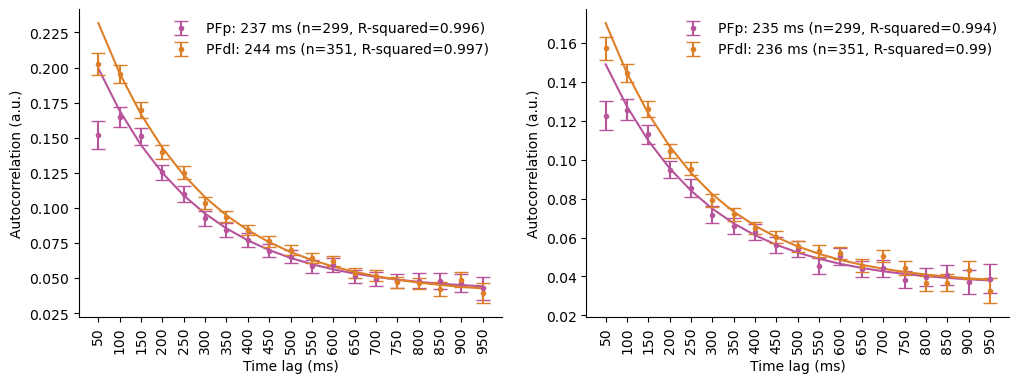

In [11]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

pfp_label = 'PFp: ' + str(int(pfp_tau_ms)) + ' ms (n=' + str(len(pfp_acf_average_trial_pearsonr_subset_df)) + ', R-squared=' + str(np.round(
    pfp_fit_r_squared, 3)) + ')'
axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp(t, pfp_popt[0], pfp_popt[1], pfp_popt[2]), color='#b8549b')

pfdl_label = 'PFdl: ' + str(int(pfdl_tau_ms)) + ' ms (n=' + str(len(pfdl_acf_average_trial_pearsonr_subset_df)) + ', R-squared=' + str(np.round(
    pfdl_fit_r_squared, 3)) + ')'
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp(t, pfdl_popt[0], pfdl_popt[1], pfdl_popt[2]), color='#dd7f28', )


pfp_label = 'PFp: ' + str(int(pfp_sttc_tau_ms)) + ' ms (n=' + str(len(pfp_acf_average_trial_sttc_subset_df)) + ', R-squared=' + str(np.round(
    pfp_sttc_fit_r_squared, 3)) + ')'
axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp(t, pfp_sttc_popt[0], pfp_sttc_popt[1], pfp_sttc_popt[2]), color='#b8549b')

pfdl_label = 'PFdl: ' + str(int(pfdl_sttc_tau_ms)) + ' ms (n=' + str(len(pfdl_acf_average_trial_sttc_subset_df)) + ', R-squared=' + str(np.round(
    pfdl_sttc_fit_r_squared, 3)) + ')'
axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp(t, pfdl_sttc_popt[0], pfdl_sttc_popt[1], pfdl_sttc_popt[2]), color='#dd7f28', )

#axes.set_ylim([0, 0.25])

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc_with_empty_0_1000_51padding.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc_with_empty_0_1000_51padding.svg', bbox_inches='tight')

#### Compare unit fits (also on constraint dataset)

In [18]:
pfdl_tau_acf_average_trial_pearsonr_subset_df_ = pfdl_tau_acf_average_trial_pearsonr_subset_df[['unit_id', 'r_squared', 'tau_ms']].copy()
pfdl_tau_acf_average_trial_pearsonr_subset_df_['metric'] = 'pearson'
pfdl_tau_acf_average_trial_pearsonr_subset_df_['area'] = 'pfdl'

pfp_tau_acf_average_trial_pearsonr_subset_df_ = pfp_tau_acf_average_trial_pearsonr_subset_df[['unit_id', 'r_squared', 'tau_ms']].copy()
pfp_tau_acf_average_trial_pearsonr_subset_df_['metric'] = 'pearson'
pfp_tau_acf_average_trial_pearsonr_subset_df_['area'] = 'pfp'

pfdl_tau_acf_average_trial_sttc_subset_df_ = pfdl_tau_acf_average_trial_sttc_subset_df[['unit_id', 'r_squared', 'tau_ms']].copy()
pfdl_tau_acf_average_trial_sttc_subset_df_['metric'] = 'sttc'
pfdl_tau_acf_average_trial_sttc_subset_df_['area'] = 'pfdl'

pfp_tau_acf_average_trial_sttc_subset_df_ = pfp_tau_acf_average_trial_sttc_subset_df[['unit_id', 'r_squared', 'tau_ms']].copy()
pfp_tau_acf_average_trial_sttc_subset_df_['metric'] = 'sttc'
pfp_tau_acf_average_trial_sttc_subset_df_['area'] = 'pfp'

tau_average_trial_subset_df = pd.concat([pfdl_tau_acf_average_trial_pearsonr_subset_df_, 
                                         pfp_tau_acf_average_trial_pearsonr_subset_df_, 
                                         pfdl_tau_acf_average_trial_sttc_subset_df_, 
                                         pfp_tau_acf_average_trial_sttc_subset_df_])
tau_average_trial_subset_df.reset_index(inplace=True, drop=True)
tau_average_trial_subset_df['area_unit_id'] = tau_average_trial_subset_df['area'].values + '_' + tau_average_trial_subset_df['unit_id'].astype(str)
tau_average_trial_subset_df

n_nan_taus_pearson = tau_average_trial_subset_df.query('metric == "pearson"')['tau_ms'].isnull().sum()
n_nan_taus_sttc = tau_average_trial_subset_df.query('metric == "sttc"')['tau_ms'].isnull().sum()
print('n_nan_taus_pearson {}, n_nan_taus_sttc {}'.format(n_nan_taus_pearson, n_nan_taus_sttc))

n_nan_taus_pearson_pers = n_nan_taus_pearson / len(tau_average_trial_subset_df.query('metric == "pearson"')) * 100
n_nan_taus_sttc_pers = n_nan_taus_sttc / len(tau_average_trial_subset_df.query('metric == "sttc"')) * 100
print('n_nan_taus_pearson_pers {}, n_nan_taus_sttc_pers {}'.format(n_nan_taus_pearson_pers, n_nan_taus_sttc_pers))

n_nan_taus_pearson 37, n_nan_taus_sttc 34
n_nan_taus_pearson_pers 5.6923076923076925, n_nan_taus_sttc_pers 5.230769230769231


In [32]:
nan_df = pd.DataFrame(np.vstack((['pearson', 'sttc'], [n_nan_taus_pearson_pers, n_nan_taus_sttc_pers])).T, 
                      columns=['metric', 'n_nan_taus_pers'])
nan_df['n_nan_taus_pers'] = nan_df['n_nan_taus_pers'].astype(float)

In [13]:
tau_average_trial_subset_df_pivot = tau_average_trial_subset_df.pivot(index=['area_unit_id'], columns='metric', values=['r_squared','tau_ms'])
tau_average_trial_subset_df_pivot

r_squared                      tau_ms              
metric         pearson          sttc       pearson          sttc
area_unit_id                                                    
pfdl_0        0.915422  9.230400e-01  1.017593e+03  4.064665e+02
pfdl_10       0.747881  8.213643e-01  6.813590e+02  9.119290e+02
pfdl_100      0.182423  2.224596e-01  2.327900e+02  3.320968e+02
pfdl_101      0.000001  4.055563e-03  7.953332e+00  5.868584e+00
pfdl_102      0.447077  2.505986e-01  5.830447e+02  3.140136e+02
...                ...           ...           ...           ...
pfp_89        0.414129  3.463179e-01  2.318165e+06  1.989933e+06
pfp_90        0.834608  8.728049e-01  1.405270e+03  1.675460e+06
pfp_91             NaN -2.935173e-08           NaN  2.958135e+00
pfp_93             NaN -2.560922e-08           NaN  2.845839e+00
pfp_97        0.612899  7.291441e-01  2.121715e+02  2.406773e+02

[650 rows x 4 columns]

In [22]:
tau_average_trial_subset_df_pivot.dropna(inplace=True)
tau_average_trial_subset_df.dropna(inplace=True)

tau_average_trial_subset_df['tau_ms_log10'] = np.log10(tau_average_trial_subset_df['tau_ms'])
tau_average_trial_subset_df

C:\Users\ipochino\.conda\envs\isttc\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,unit_id,r_squared,tau_ms,metric,area,area_unit_id,tau_ms_log10
0,0,0.915422,1.017593e+03,pearson,pfdl,pfdl_0,3.007574
1,3,0.902492,3.030040e+02,pearson,pfdl,pfdl_3,2.481448
2,4,0.675223,1.653280e+02,pearson,pfdl,pfdl_4,2.218346
3,5,0.975709,4.476878e+02,pearson,pfdl,pfdl_5,2.650975
4,6,0.451941,6.532309e+02,pearson,pfdl,pfdl_6,2.815067
...,...,...,...,...,...,...,...
1295,533,0.763110,1.906198e+02,sttc,pfp,pfp_533,2.280168
1296,535,0.721461,2.081146e+06,sttc,pfp,pfp_535,6.318303
1297,536,0.808724,1.058267e+02,sttc,pfp,pfp_536,2.024595
1298,537,0.798131,8.406402e+01,sttc,pfp,pfp_537,1.924610


C:\Users\ipochino\AppData\Local\Temp\ipykernel_16708\3692922314.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='metric', y='n_nan_taus_pers', data=nan_df, palette=['darkgrey','steelblue'], legend=False)


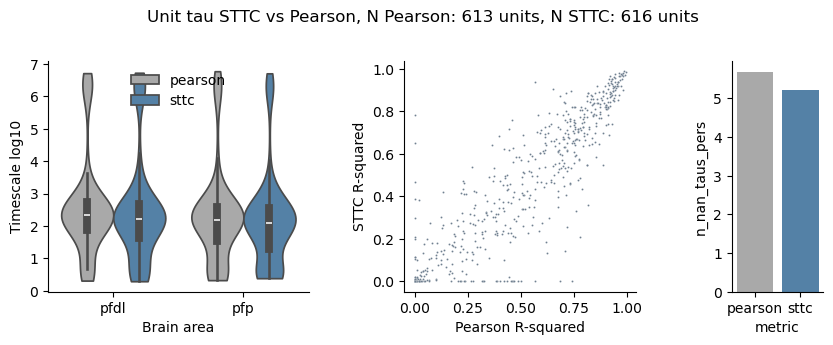

In [49]:
fig, axes = plt.subplots(1,3, figsize=(10,3), gridspec_kw={'width_ratios': [2, 2, 0.7]})
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='area', y='tau_ms_log10', hue='metric', data=tau_average_trial_subset_df.query('tau_ms >= 0'), 
               cut=0, density_norm='width', palette=['darkgrey','steelblue'])
axes[0].legend(frameon=False, loc='upper center')
axes[0].set_xlabel('Brain area')
axes[0].set_ylabel('Timescale log10')


sns.scatterplot(ax=axes[1], x=tau_average_trial_subset_df_pivot['r_squared','pearson'].values, 
                y=tau_average_trial_subset_df_pivot['r_squared','sttc'].values, s=2, color='slategray')
#axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')

sns.barplot(ax=axes[2], x='metric', y='n_nan_taus_pers', data=nan_df, palette=['darkgrey','steelblue'], legend=False)

fig.suptitle('Unit tau STTC vs Pearson, N Pearson: {} units, N STTC: {} units'.format(len(tau_average_trial_subset_df.query('metric == "pearson"')), 
                                                                              len(tau_average_trial_subset_df.query('metric == "sttc"'))), y=1.05)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'sttc_vs_pearson_constrained_dataset_with_empty_0_1000_51padding.png' , bbox_inches='tight')
    fig.savefig(fig_folder + 'sttc_vs_pearson_constrained_dataset_with_empty_0_1000_51padding.svg' , bbox_inches='tight')

### Export for stats

In [50]:
stats_folder = results_folder + 'stats\\'

In [51]:
tau_average_trial_subset_df.to_csv(stats_folder + 'tau_average_trial_sttc_and_pearson_constrained_dataset_with_empty_0_1000_51padding_df.csv')